EDA

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [21]:
data = pd.read_csv("fmcd.csv")

In [22]:
print(data.describe())

       Serve Size (g)       Energy      Protein    Total Fat      Sat Fat  \
count     2500.000000  2500.000000  2500.000000  2500.000000  2500.000000   
mean       213.657592   548.462496    14.844632    22.393216    10.452768   
std         78.102276   203.497276     5.704769     9.870624     5.480804   
min         80.000000   200.190000     5.010000     5.020000     1.010000   
25%        145.827500   373.545000     9.857500    14.250000     5.700000   
50%        215.350000   552.160000    14.900000    21.925000    10.405000   
75%        281.397500   726.442500    19.755000    30.952500    15.100000   
max        349.770000   899.990000    25.000000    39.950000    19.990000   

         Trans Fat  Cholesterol  Total Carbohydrate  Total Sugars  \
count  2500.000000  2500.000000         2500.000000   2500.000000   
mean      0.490072    25.629812           69.645476     10.108420   
std       0.284362    14.448031           29.080579      5.711975   
min       0.000000     0.01000

In [23]:
bar_fig = px.bar(data, x='City', y='Popularity', color='City', title='Interactive Bar Chart',
                 labels={'Popularity': 'Popularity Score'})
bar_fig.show()


sunburst_fig = px.sunburst(data, path=['City', 'Menu Category', 'Menu Item'],
                           title='Interactive Sunburst Chart',
                           labels={'value': 'Popularity Score'})
sunburst_fig.show()


In [24]:
data['Serve Size (g)'] = data['Serve Size (g)'].astype(float)
data['Energy'] = data['Energy'].astype(float)
data['Protein'] = data['Protein'].astype(float)
data['Total Fat'] = data['Total Fat'].astype(float)
data['Sat Fat'] = data['Sat Fat'].astype(float)
data['Trans Fat'] = data['Trans Fat'].astype(float)
data['Cholesterol'] = data['Cholesterol'].astype(float)
data['Total Carbohydrate'] = data['Total Carbohydrate'].astype(float)
data['Total Sugars'] = data['Total Sugars'].astype(float)
data['Added Sugars'] = data['Added Sugars'].astype(float)
data['Sodium'] = data['Sodium'].astype(float)

In [25]:
data['Total Fat %'] = data['Total Fat'] / data['Serve Size (g)'] * 100
data['Sat Fat %'] = data['Sat Fat'] / data['Total Fat'] * 100
data['Trans Fat %'] = data['Trans Fat'] / data['Total Fat'] * 100
data['Cholesterol mg'] = data['Cholesterol'] / data['Serve Size (g)'] * 100
data['Carbohydrate %'] = data['Total Carbohydrate'] / data['Serve Size (g)'] * 100
data['Sugars %'] = data['Total Sugars'] / data['Serve Size (g)'] * 100
data['Added Sugars %'] = data['Added Sugars'] / data['Total Sugars'] * 100
data['Sodium mg'] = data['Sodium'] / data['Serve Size (g)'] * 100

In [26]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [27]:
lr_model = LinearRegression()
lr_model.fit(train_data[['Serve Size (g)', 'Energy', 'Protein', 'Total Fat %', 'Sat Fat %', 'Trans Fat %', 'Cholesterol mg', 'Carbohydrate %', 'Sugars %', 'Added Sugars %', 'Sodium mg']], train_data['Popularity'])


LinearRegression()

In [28]:
ridge_model = Ridge()
ridge_model.fit(train_data[['Serve Size (g)', 'Energy', 'Protein', 'Total Fat %', 'Sat Fat %', 'Trans Fat %', 'Cholesterol mg', 'Carbohydrate %', 'Sugars %', 'Added Sugars %', 'Sodium mg']], train_data['Popularity'])


Ridge()

In [29]:
rf_model = RandomForestRegressor()
rf_model.fit(train_data[['Serve Size (g)', 'Energy', 'Protein', 'Total Fat %', 'Sat Fat %', 'Trans Fat %', 'Cholesterol mg', 'Carbohydrate %', 'Sugars %', 'Added Sugars %', 'Sodium mg']], train_data['Popularity'])

RandomForestRegressor()

In [30]:
y_pred_lr = lr_model.predict(test_data[['Serve Size (g)', 'Energy', 'Protein', 'Total Fat %', 'Sat Fat %', 'Trans Fat %', 'Cholesterol mg', 'Carbohydrate %', 'Sugars %', 'Added Sugars %', 'Sodium mg']])
mse_lr = mean_squared_error(test_data['Popularity'], y_pred_lr)
r2_lr = r2_score(test_data['Popularity'], y_pred_lr)


In [31]:
y_pred_ridge = ridge_model.predict(test_data[['Serve Size (g)', 'Energy', 'Protein', 'Total Fat %', 'Sat Fat %', 'Trans Fat %', 'Cholesterol mg', 'Carbohydrate %', 'Sugars %', 'Added Sugars %', 'Sodium mg']])
mse_ridge = mean_squared_error(test_data['Popularity'], y_pred_ridge)
r2_ridge = r2_score(test_data['Popularity'], y_pred_ridge)

In [32]:
y_pred_rf = rf_model.predict(test_data[['Serve Size (g)', 'Energy', 'Protein', 'Total Fat %', 'Sat Fat %', 'Trans Fat %', 'Cholesterol mg', 'Carbohydrate %', 'Sugars %', 'Added Sugars %', 'Sodium mg']])
mse_rf = mean_squared_error(test_data['Popularity'], y_pred_rf)
r2_rf = r2_score(test_data['Popularity'], y_pred_rf)

In [33]:
print("Linear Regression:")
print("MSE: ", mse_lr)
print("R-squared: ", r2_lr)

print("Ridge Regression:")
print("MSE: ", mse_ridge)
print("R-squared: ", r2_ridge)

print("Random Forest Regressor:")
print("MSE: ", mse_rf)
print("R-squared: ", r2_rf)

Linear Regression:
MSE:  6.129966483236214
R-squared:  0.000316334642923799
Ridge Regression:
MSE:  6.129967110180874
R-squared:  0.000316232399895755
Random Forest Regressor:
MSE:  6.096083041399999
R-squared:  0.005842094599747827


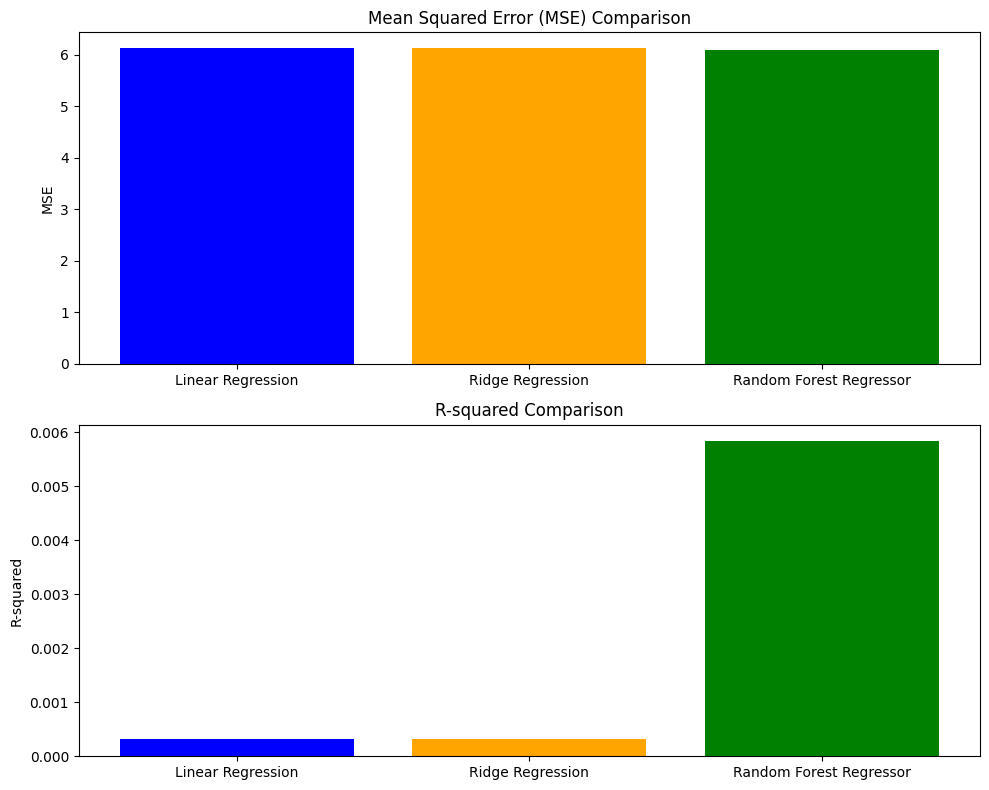

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have defined mse_lr, r2_lr, mse_ridge, r2_ridge, mse_rf, r2_rf
model_names = ['Linear Regression', 'Ridge Regression', 'Random Forest Regressor']
mse_values = [mse_lr, mse_ridge, mse_rf]
r2_values = [r2_lr, r2_ridge, r2_rf]

# Create a DataFrame for visualization
df_vis = pd.DataFrame({'Model': model_names, 'MSE': mse_values, 'R-squared': r2_values})

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Bar plot for MSE
axes[0].bar(df_vis['Model'], df_vis['MSE'], color=['blue', 'orange', 'green'])
axes[0].set_ylabel('MSE')
axes[0].set_title('Mean Squared Error (MSE) Comparison')

# Bar plot for R-squared
axes[1].bar(df_vis['Model'], df_vis['R-squared'], color=['blue', 'orange', 'green'])
axes[1].set_ylabel('R-squared')
axes[1].set_title('R-squared Comparison')

plt.tight_layout()
plt.show()


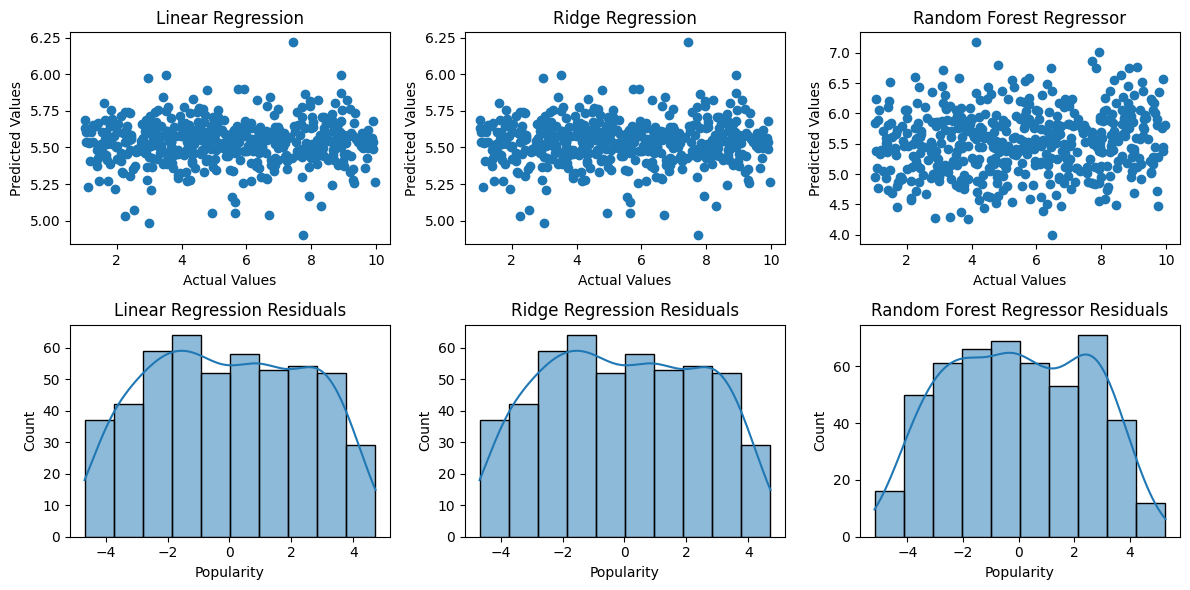

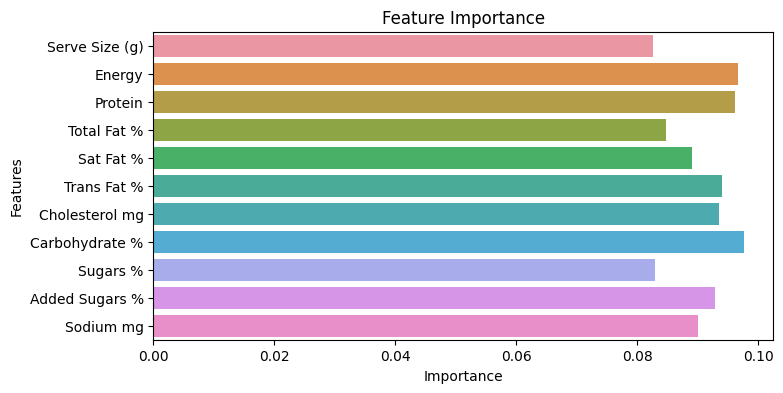

In [35]:
# Assuming you have a variable y_true containing the actual target values
y_true = test_data['Popularity']

# Visualize Predictions
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.scatter(y_true, y_pred_lr)
plt.title('Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(2, 3, 2)
plt.scatter(y_true, y_pred_ridge)
plt.title('Ridge Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(2, 3, 3)
plt.scatter(y_true, y_pred_rf)
plt.title('Random Forest Regressor')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Residual Analysis
plt.subplot(2, 3, 4)
residuals_lr = y_true - y_pred_lr
sns.histplot(residuals_lr, kde=True)
plt.title('Linear Regression Residuals')

plt.subplot(2, 3, 5)
residuals_ridge = y_true - y_pred_ridge
sns.histplot(residuals_ridge, kde=True)
plt.title('Ridge Regression Residuals')

plt.subplot(2, 3, 6)
residuals_rf = y_true - y_pred_rf
sns.histplot(residuals_rf, kde=True)
plt.title('Random Forest Regressor Residuals')

plt.tight_layout()
plt.show()

# Feature Importance (Random Forest)
plt.figure(figsize=(8, 4))
sns.barplot(x=rf_model.feature_importances_, y=['Serve Size (g)', 'Energy', 'Protein', 'Total Fat %', 'Sat Fat %', 'Trans Fat %', 'Cholesterol mg', 'Carbohydrate %', 'Sugars %', 'Added Sugars %', 'Sodium mg'])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


In [36]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Assuming 'df' is your DataFrame and 'feature_columns' is a list of column names representing features
feature_columns = ['Serve Size (g)', 'Energy', 'Protein', 'Total Fat', 'Sat Fat', 'Trans Fat', 'Cholesterol', 'Total Carbohydrate', 'Total Sugars', 'Added Sugars', 'Sodium']
X = data[feature_columns]

# Assuming 'Popularity' is the target variable
y = data['Popularity']

# Cross-Validation
# Assuming 'X' is your feature matrix, and 'y' is the target variable
# Perform cross-validation for Linear Regression
# Cross-Validation for Linear Regression
cv_lr = cross_val_score(lr_model, X, y, scoring='neg_mean_squared_error', cv=5)
print("Cross-Validation MSE (Linear Regression):", -cv_lr.mean())

# Cross-Validation for Ridge Regression
cv_ridge = cross_val_score(ridge_model, X, y, scoring='neg_mean_squared_error', cv=5)
print("Cross-Validation MSE (Ridge Regression):", -cv_ridge.mean())

# Cross-Validation for Random Forest Regressor
cv_rf = cross_val_score(rf_model, X, y, scoring='neg_mean_squared_error', cv=5)
print("Cross-Validation MSE (Random Forest):", -cv_rf.mean())

# Hyperparameter Tuning (Random Forest)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_rf = GridSearchCV(RandomForestRegressor(), param_grid, scoring='neg_mean_squared_error', cv=5)
grid_rf.fit(X, y)

print("Best Hyperparameters (Random Forest):", grid_rf.best_params_)
print("Best Cross-Validation MSE (Random Forest):", -grid_rf.best_score_)

# Try Different Regression Models
# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor()
cv_gb = cross_val_score(gb_model, X, y, scoring='neg_mean_squared_error', cv=5)
print("Cross-Validation MSE (Gradient Boosting):", -cv_gb.mean())



Cross-Validation MSE (Linear Regression): 6.959513795229976
Cross-Validation MSE (Ridge Regression): 6.9594721303729035
Cross-Validation MSE (Random Forest): 7.178403330927999
Best Hyperparameters (Random Forest): {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation MSE (Random Forest): 7.0204587480319445
Cross-Validation MSE (Gradient Boosting): 7.138152361121972


Sentiment Analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Menu Category          2500 non-null   object 
 1   Menu Item              2500 non-null   object 
 2   City                   2500 non-null   object 
 3   Serve Size (g)         2500 non-null   float64
 4   Energy                 2500 non-null   float64
 5   Protein                2500 non-null   float64
 6   Total Fat              2500 non-null   float64
 7   Sat Fat                2500 non-null   float64
 8   Trans Fat              2500 non-null   float64
 9   Cholesterol            2500 non-null   float64
 10  Total Carbohydrate     2500 non-null   float64
 11  Total Sugars           2500 non-null   float64
 12  Added Sugars           2500 non-null   float64
 13  Sodium                 2500 non-null   float64
 14  Popularity             2500 non-null   float64
 15  Pric

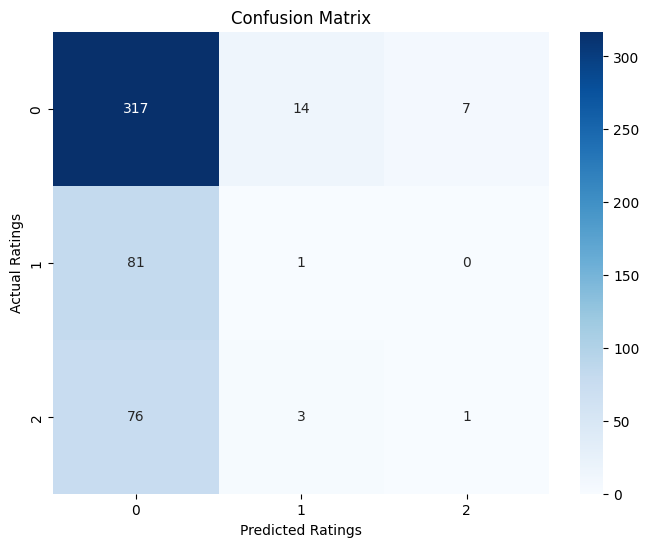

In [37]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset from CSV
file_path = "/content/fmcd.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values for simplicity (you may want to handle missing data more effectively)
df = df.dropna(subset=['Customer Ratings'])

# Convert numerical ratings into classes
def categorize_ratings(rating):
    if rating >= 8.5:
        return 'Positive'
    elif rating >= 7.0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply the categorization function to create a new column 'RatingClass'
df['RatingClass'] = df['Customer Ratings'].apply(categorize_ratings)

# Split the dataset into features (X) and target variable (y)
X = df['Menu Item']
y = df['RatingClass']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a simple Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_vectorized)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.title('Confusion Matrix')
plt.show()


Predicted RatingClass Frequency:
Negative    474
Neutral      18
Positive      8
Name: Predicted RatingClass, dtype: int64


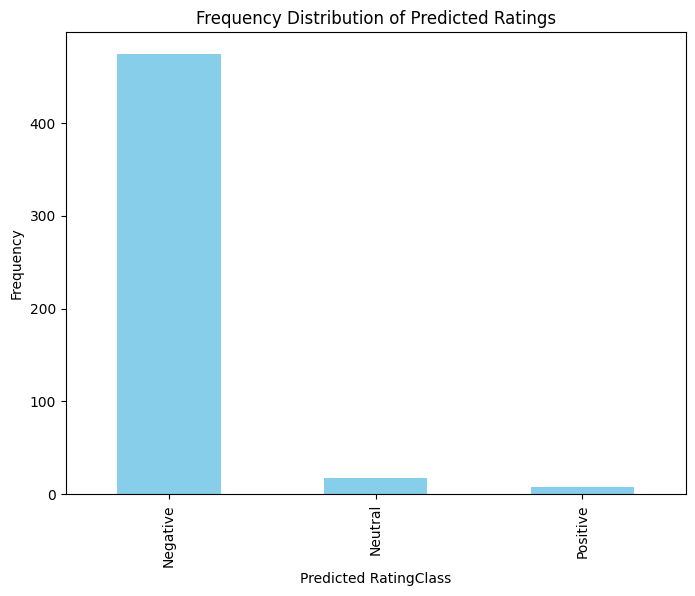

In [38]:
# Convert the predicted labels to a pandas Series
predicted_series = pd.Series(y_pred, name='Predicted RatingClass')

# Display the frequency distribution of predicted ratings
predicted_frequency = predicted_series.value_counts()

print("Predicted RatingClass Frequency:")
print(predicted_frequency)

# Plot the frequency distribution
plt.figure(figsize=(8, 6))
predicted_frequency.plot(kind='bar', color='skyblue')
plt.xlabel('Predicted RatingClass')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Predicted Ratings')
plt.show()


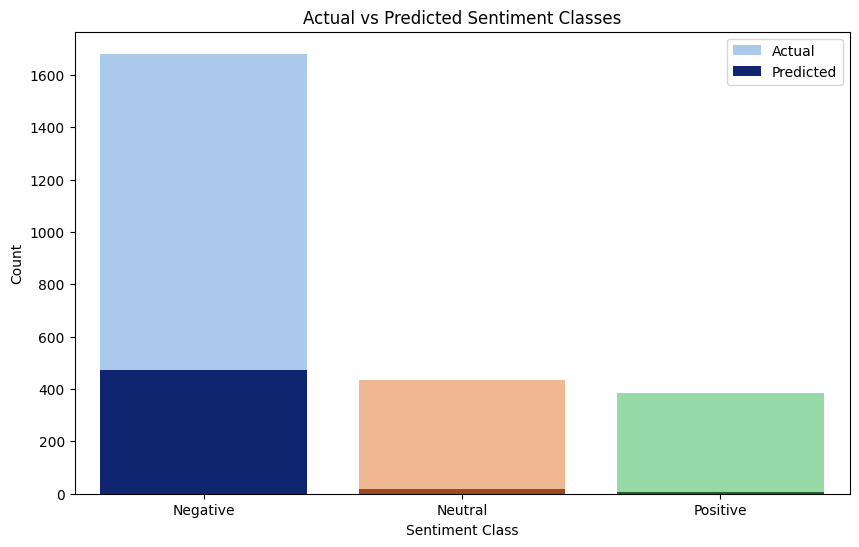

In [39]:
# Additional visualization for predicted vs actual sentiment classes
plt.figure(figsize=(10, 6))

# Bar plot for actual sentiment classes
sns.countplot(x='RatingClass', data=df, order=['Negative', 'Neutral', 'Positive'], label='Actual', palette='pastel')

# Bar plot for predicted sentiment classes
sns.countplot(x=y_pred, order=['Negative', 'Neutral', 'Positive'], label='Predicted', palette='dark')

plt.title('Actual vs Predicted Sentiment Classes')
plt.xlabel('Sentiment Class')
plt.ylabel('Count')
plt.legend()
plt.show()


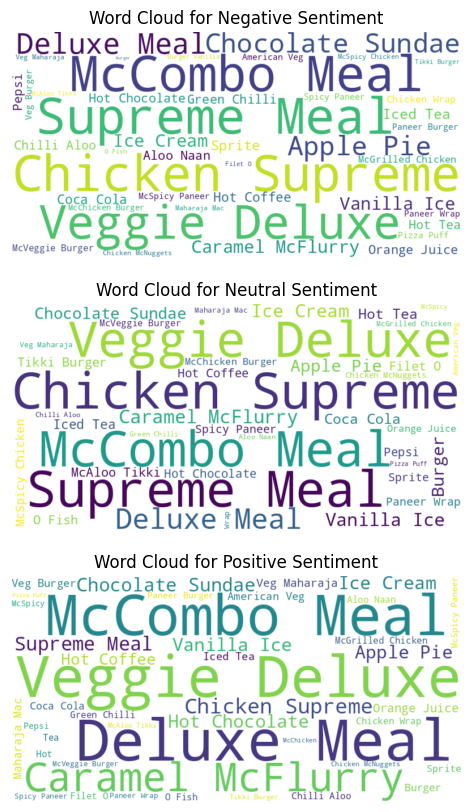

In [40]:
from wordcloud import WordCloud

# Create separate datasets for each sentiment class
negative_reviews = df[df['RatingClass'] == 'Negative']['Menu Item']
neutral_reviews = df[df['RatingClass'] == 'Neutral']['Menu Item']
positive_reviews = df[df['RatingClass'] == 'Positive']['Menu Item']

# Generate Word Clouds for each sentiment class
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_reviews))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Word Cloud for Negative Sentiment')
plt.axis('off')

plt.subplot(3, 1, 2)
wordcloud_neu = WordCloud(width=800, height=400, background_color='white').generate(' '.join(neutral_reviews))
plt.imshow(wordcloud_neu, interpolation='bilinear')
plt.title('Word Cloud for Neutral Sentiment')
plt.axis('off')

plt.subplot(3, 1, 3)
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_reviews))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiment')
plt.axis('off')

plt.show()


### User Inputs

<ipython-input-42-fd81883c3e8d>:23: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-42-fd81883c3e8d>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Welcome to the Advanced Food Recommendation System!
Please provide your preferences:
Enter the minimum Energy value: 400
Enter the maximum Energy value: 900
Enter the minimum Protein value: 9
Enter the maximum Protein value:16
Enter the maximum Price you are willing to pay:7
Enter the minimum Serve Size (g): 230
Enter the maximum Serve Size (g): 310
Are you health-conscious? (Yes/No): Yes


<ipython-input-42-fd81883c3e8d>:101: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-42-fd81883c3e8d>:104: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




User Input Details:
{'min_energy': 400.0, 'max_energy': 900.0, 'min_protein': 9.0, 'max_protein': 16.0, 'max_price': 7.0, 'min_serve_size': 230.0, 'max_serve_size': 310.0, 'health_conscious': 'Yes'}

Recommended Menu Items:
                   Menu Item  Serve Size (g)  Price  Energy  Protein  \
149             McCombo Meal          239.65   5.76  447.99    10.24   
1966    Chicken Supreme Meal          272.65   1.83  767.39    14.54   
1187       Vanilla Ice Cream          247.26   3.21  581.39    13.92   
1297        Chocolate Sundae          246.54   4.61  684.24    12.40   
1338  McSpicy™ Paneer Burger          255.32   4.43  648.15    14.09   
1389                Iced Tea          246.75   1.93  478.22    11.64   
1575            Orange Juice          241.14   6.62  517.82    14.56   
1586       Spicy Paneer Wrap          305.36   4.45  472.71    11.53   
1865        Chocolate Sundae          237.97   1.37  530.36    11.54   
2007      Veggie Deluxe Meal          263.02   5.63  42

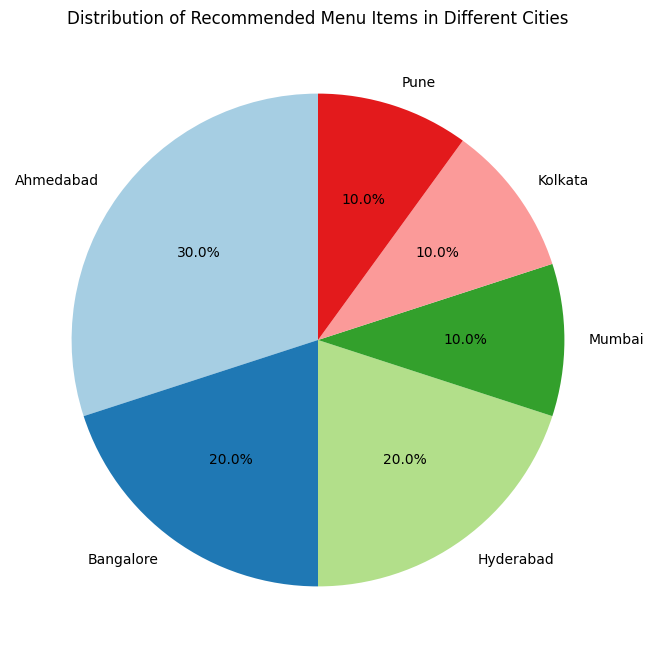


Final Recommendations (with 'Good' Nutritional Score):
                   Menu Item  Serve Size (g)  Price  Energy  Protein  \
149             McCombo Meal          239.65   5.76  447.99    10.24   
1966    Chicken Supreme Meal          272.65   1.83  767.39    14.54   
1187       Vanilla Ice Cream          247.26   3.21  581.39    13.92   
1338  McSpicy™ Paneer Burger          255.32   4.43  648.15    14.09   
1575            Orange Juice          241.14   6.62  517.82    14.56   
2007      Veggie Deluxe Meal          263.02   5.63  424.39    10.08   

      Nutritional Score Nutritional Score Category       City  
149             1875.13                       Good  Ahmedabad  
1966            1588.24                       Good     Mumbai  
1187            1972.48                       Good  Bangalore  
1338            2138.96                       Good  Ahmedabad  
1575            1592.41                       Good  Bangalore  
2007            2061.63                       Good  Hyd

In [42]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.model_selection import train_test_split

df = pd.read_csv("fmcd.csv")

# Preprocess the data for content-based filtering
df['Features'] = df[['Energy', 'Protein', 'Total Fat', 'Sat Fat', 'Trans Fat', 'Cholesterol',
                     'Total Carbohydrate', 'Total Sugars', 'Sodium']].astype(str).agg(' '.join, axis=1)

# Vectorize the features
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Features'])

# Extract relevant columns
columns = ['Serve Size (g)', 'Energy', 'Protein', 'Total Fat', 'Sat Fat', 'Trans Fat', 'Cholesterol',
           'Total Carbohydrate', 'Total Sugars', 'Sodium', 'Price', 'City', 'Health Conscious']

# Fill any missing values with appropriate values or strategies
df[columns].fillna(value=df[columns].mean(), inplace=True)

def calculate_nutritional_score(row):
    # Customize the formula based on your preferences
    nutritional_components = ['Energy', 'Protein', 'Total Fat', 'Cholesterol', 'Total Carbohydrate', 'Sodium']

    # Sum up the values of selected nutritional components
    score = row[nutritional_components].sum()

    # Normalize the score (optional)
    max_score = len(nutritional_components) * 100  # Assuming maximum value for each component is 100
    normalized_score = (score / max_score) * 100

    return normalized_score

# Apply the nutritional score calculation to each row
df['Nutritional Score'] = df.apply(calculate_nutritional_score, axis=1)

# Function to calculate nutritional score category
def categorize_nutritional_score(score):
    if score >= 1500:
        return 'Good'
    elif 1000 <= score < 1500:
        return 'Not Preferred'
    else:
        return 'Not Good'

# Continue with the rest of your code for user input and recommendation

def process_user_input():
    print("Welcome to the Advanced Food Recommendation System!")
    print("Please provide your preferences:")

    preferences = {}

    preferences['min_energy'] = float(input("Enter the minimum Energy value: "))
    preferences['max_energy'] = float(input("Enter the maximum Energy value: "))

    preferences['min_protein'] = float(input("Enter the minimum Protein value: "))
    preferences['max_protein'] = float(input("Enter the maximum Protein value:"))

    preferences['max_price'] = float(input("Enter the maximum Price you are willing to pay:"))

    preferences['min_serve_size'] = float(input("Enter the minimum Serve Size (g): "))
    preferences['max_serve_size'] = float(input("Enter the maximum Serve Size (g): "))

    preferences['health_conscious'] = input("Are you health-conscious? (Yes/No): ").capitalize()

    return preferences

def recommend_items(user_preferences):
    # Combine user features with additional preferences
    user_query = f"{user_preferences['min_serve_size']} {user_preferences['max_serve_size']} {user_preferences['health_conscious']}"

    # Transform user query into a feature vector using the trained TF-IDF vectorizer
    user_query_vector = tfidf_vectorizer.transform([user_query])

    # Calculate the cosine similarity between the user query and all menu items
    cosine_similarities = linear_kernel(user_query_vector, tfidf_matrix).flatten()

    # Add cosine similarities as a new column in the DataFrame
    df['Cosine Similarity'] = cosine_similarities

    # Filter the dataset based on user preferences and price
    filtered_data = df[
        (df['Energy'].between(user_preferences['min_energy'], user_preferences['max_energy'])) &
        (df['Protein'].between(user_preferences['min_protein'], user_preferences['max_protein'])) &
        (df['Price'] <= user_preferences['max_price']) &
        (df['Serve Size (g)'].between(user_preferences['min_serve_size'], user_preferences['max_serve_size'])) &
        (df['Health Conscious'] == user_preferences['health_conscious'])
    ]

    # Ensure we have enough items to recommend
    if len(filtered_data) < 10:
        print("Not enough items matching the criteria. Please adjust your preferences.")
        return

    # Calculate nutritional score for each recommended item
    filtered_data['Nutritional Score'] = filtered_data[['Energy', 'Protein', 'Total Fat', 'Cholesterol', 'Total Carbohydrate', 'Sodium']].sum(axis=1)

    # Categorize nutritional score
    filtered_data['Nutritional Score Category'] = filtered_data['Nutritional Score'].apply(categorize_nutritional_score)

    # Display user input details
    print("\nUser Input Details:")
    print(user_preferences)

    # Display the top recommended menu items
    recommendations = filtered_data.sort_values(by='Cosine Similarity', ascending=False).head(10)[['Menu Item', 'Serve Size (g)', 'Price', 'Energy', 'Protein', 'Nutritional Score', 'Nutritional Score Category', 'City']]
    print("\nRecommended Menu Items:")
    print(recommendations)

    # Visualize the distribution of recommended items in different cities using a pie chart
    city_distribution = recommendations['City'].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(city_distribution, labels=city_distribution.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    plt.title('Distribution of Recommended Menu Items in Different Cities')
    plt.show()

    # Visualize the popularity of recommended items using a bar chart
# Filter recommendations for 'Good' nutritional score category
    final_recommendations = recommendations[recommendations['Nutritional Score Category'] == 'Good']

    fig = px.bar(final_recommendations,
             x='Menu Item',
             y='Nutritional Score',
             color='Nutritional Score',
             labels={'Nutritional Score': 'Nutritional Score'},
             title='Nutritional Score of Recommended Menu Items',
             template='plotly_dark')  # You can change the template as per your preference

# Rotate x-axis labels for better visibility
    fig.update_layout(xaxis=dict(tickangle=45, tickmode='array', tickvals=list(range(len(final_recommendations))), ticktext=final_recommendations['Menu Item']))

# Show the interactive plot
    fig.show()

# Display the final recommendations
    print("\nFinal Recommendations (with 'Good' Nutritional Score):")
    print(final_recommendations)


# Example user input
user_preferences = process_user_input()

# Recommend items based on user preferences and visualize
recommend_items(user_preferences)
